In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths

In [9]:
# Load the dataset
df = pd.read_csv('Simulator_readings.csv')

In [10]:
# Display the first few rows of the dataset to understand its structure
df.head()

,Time(ms),Fhr1(BPM),Fhr2(BPM),Uc(TOCO)
0,250,126,0,9
1,500,126,0,9
2,750,126,0,10
3,1000,126,0,10
4,1250,126,0,10


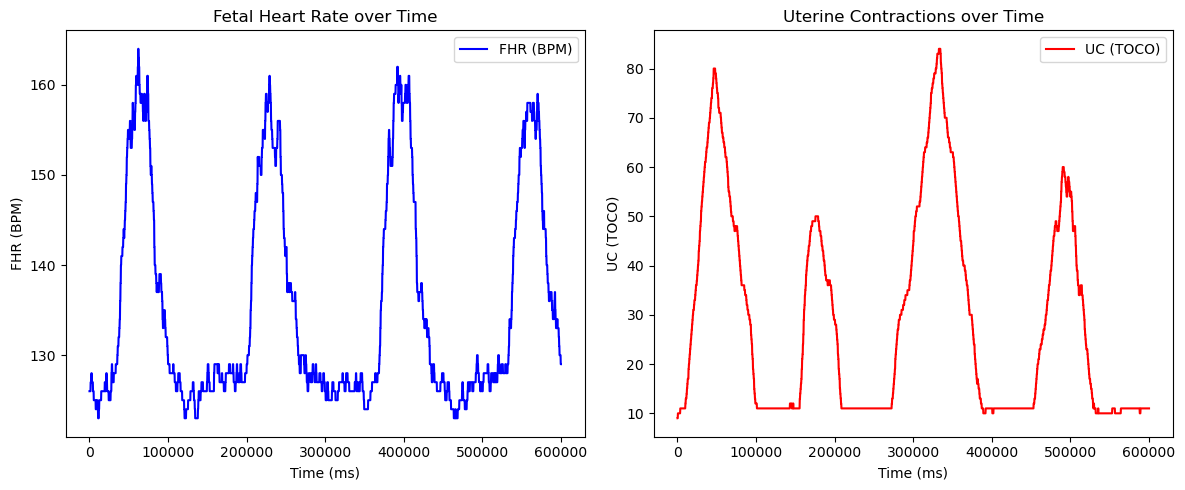

In [11]:
# 1. Plotting FHR and UC graphs

plt.figure(figsize=(12, 5))

# Plot FHR
plt.subplot(1, 2, 1)
plt.plot(df['Time(ms)'], df['Fhr1(BPM)'], color='b', label='FHR (BPM)')
plt.xlabel('Time (ms)')
plt.ylabel('FHR (BPM)')
plt.title('Fetal Heart Rate over Time')
plt.legend()

# Plot UC
plt.subplot(1, 2, 2)
plt.plot(df['Time(ms)'], df['Uc(TOCO)'], color='r', label='UC (TOCO)')
plt.xlabel('Time (ms)')
plt.ylabel('UC (TOCO)')
plt.title('Uterine Contractions over Time')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# 2. FHR Analysis over epochs (3.75-second intervals)

# Data is sampled every 250 ms, so 3.75 seconds = 3.75 * 1000 / 250 = 15 data points
epoch_length = 15
df['Epoch'] = df.index // epoch_length

# Calculate average FHR (BPM) and Pulse Interval (ms) for each epoch
epoch_avg_fhr = df.groupby('Epoch')['Fhr1(BPM)'].mean()
epoch_avg_pulse_interval = 60000 / epoch_avg_fhr  # Pulse interval in ms

# Display average FHR and Pulse Interval for the first few epochs
print("Average FHR for each epoch (first few):")
epoch_avg_fhr.head()


Average FHR for each epoch (first few):


Epoch
0    126.733333
1    125.666667
2    124.466667
3    124.466667
4    126.000000
Name: Fhr1(BPM), dtype: float64

In [13]:
# Display average Pulse Interval for the first few epochs
print("Average Pulse Interval for each epoch (first few):")
epoch_avg_pulse_interval.head()


Average Pulse Interval for each epoch (first few):


Epoch
0    473.435034
1    477.453581
2    482.056776
3    482.056776
4    476.190476
Name: Fhr1(BPM), dtype: float64

In [14]:
# 3. UC Peak Detection

# Detect peaks where UC is greater than a threshold (adjustable)
peaks, _ = find_peaks(df['Uc(TOCO)'], height=10)

# Calculate widths of the peaks at half their height
widths = peak_widths(df['Uc(TOCO)'], peaks, rel_height=0.5)


# Peaks where width > 30 seconds (30 seconds = 120 data points as data is sampled at 250 ms)
wide_peaks = widths[0] > 120

# Calculate the average duration of peaks wider than 30 seconds
avg_duration_wide_peaks = widths[0][wide_peaks].mean() / 4  # Convert width from data points to seconds

print(f"Average duration of UC peaks wider than 30 seconds: {avg_duration_wide_peaks} seconds")


Average duration of UC peaks wider than 30 seconds: 45.34375 seconds
